# **[필수과제] Outlier**

*   변수들 추가하며 실제 outlier값 비교
*   outlier 파생변수 추가한 내용 & outlier 제거한 내용 비교 분석
*   어떻게 값 변화하는지 정리





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import datasets

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### columns 시각화

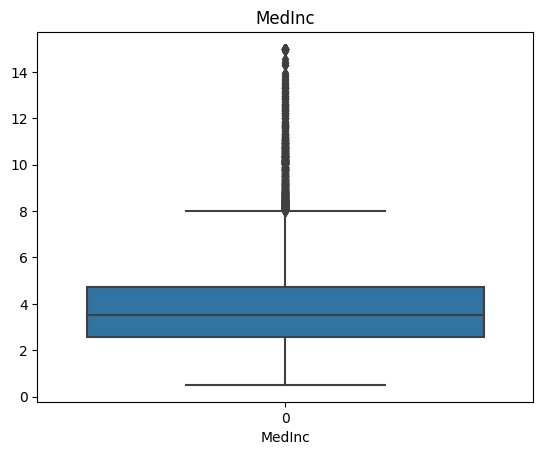

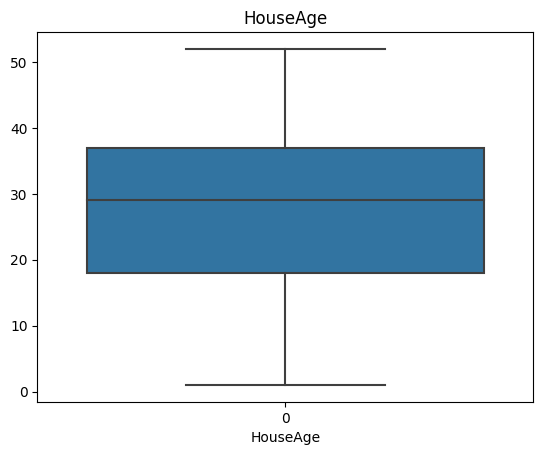

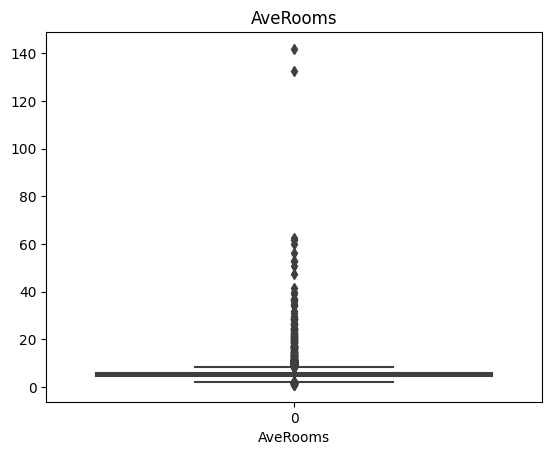

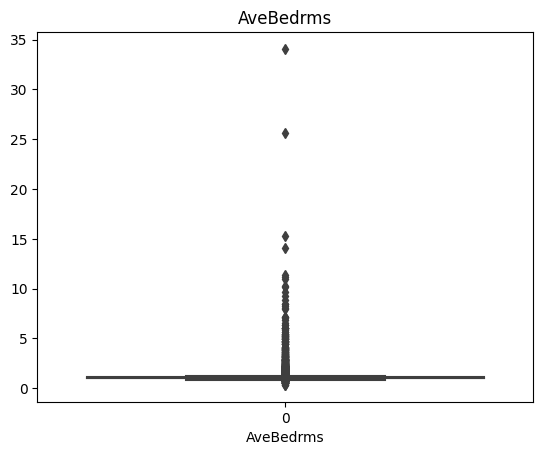

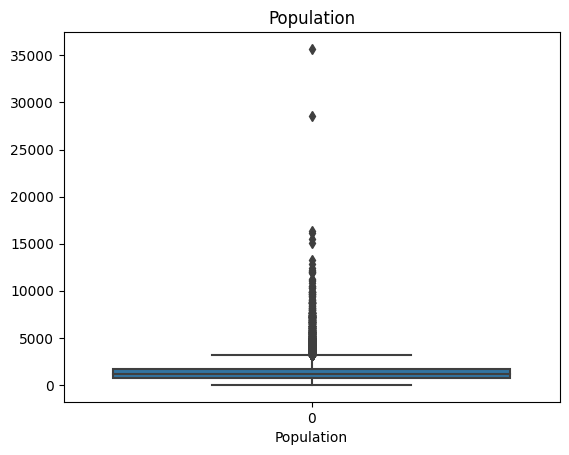

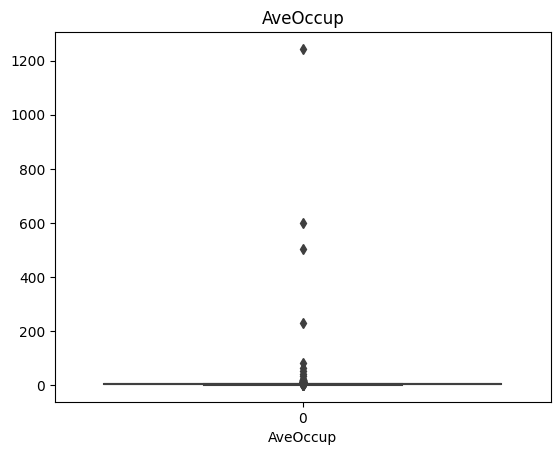

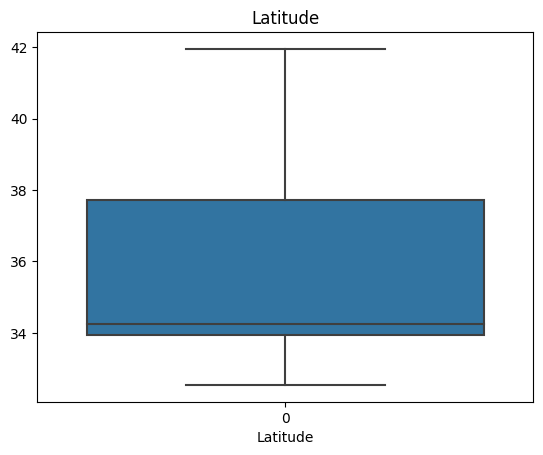

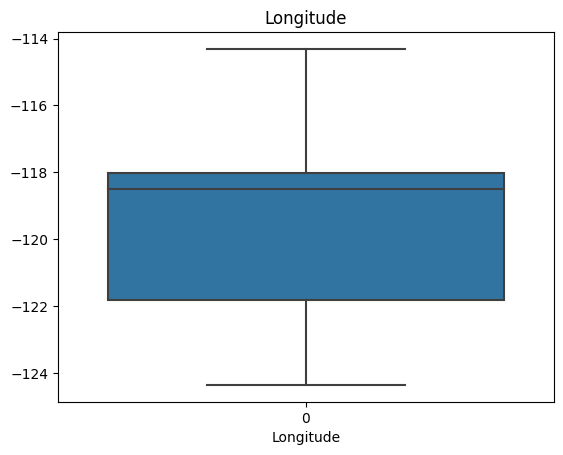

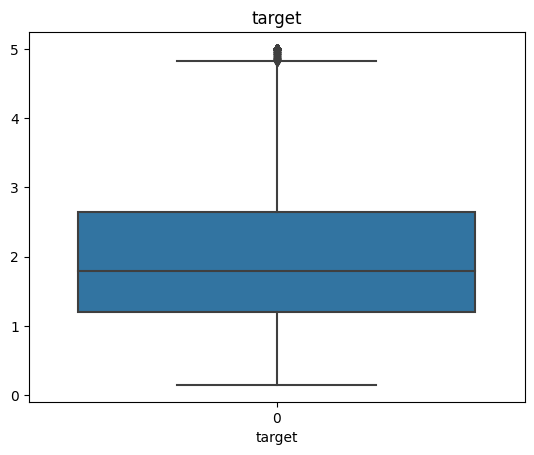

In [ ]:
for col in df.columns.values:
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.show()

## 변수 담아서 비교

In [ ]:
df_sp = df[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'target']]

In [ ]:
df_sp1 = df_sp.copy()
df_sp2 = df_sp.copy()
df_sp3 = df_sp.copy()

### **기존 데이터**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_sp1.drop('target', axis=1), df_sp1['target'],
                                                    test_size=0.3, random_state=111)

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

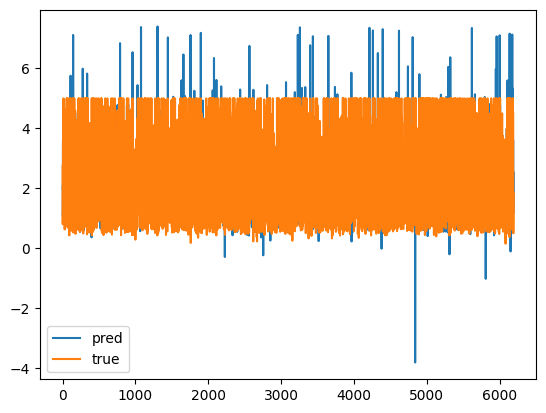

In [ ]:
fit_train1 = sm.OLS(y_train, X_train)
fit_train1 = fit_train1.fit()

plt.plot(np.array(fit_train1.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='true')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(X_test))
print(mse1)

0.6733369308637225


### **이상치 제거**

In [ ]:
def replace_outlier(value):
    Q1 = df_sp2['Population'].quantile(0.25)
    Q3 = df_sp2['Population'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 3

    if((value <(Q1-rev_range*IQR))):
        value = np.nan
    if((value >(Q3+rev_range*IQR))):
        value = np.nan
    return value

df_sp2['Population'] = df_sp2['Population'].apply(replace_outlier).copy()

In [ ]:
df_sp2.isna().sum()

MedInc          0
HouseAge        0
AveRooms        0
Population    421
target          0
dtype: int64

In [ ]:
# 이상치 제거한 후 분석
df_sp2 = df_sp2.dropna()

In [ ]:
df_sp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20219 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20219 non-null  float64
 1   HouseAge    20219 non-null  float64
 2   AveRooms    20219 non-null  float64
 3   Population  20219 non-null  float64
 4   target      20219 non-null  float64
dtypes: float64(5)
memory usage: 947.8 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_sp2.drop('target', axis=1), df_sp2['target'],
                                                    test_size=0.3, random_state=111)

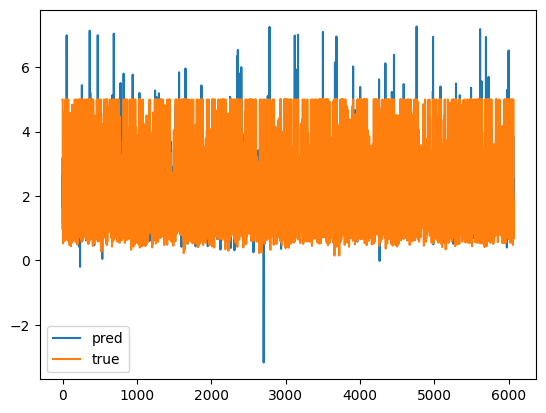

In [ ]:
fit_train2 = sm.OLS(y_train, X_train)
fit_train2 = fit_train2.fit()

plt.plot(np.array(fit_train2.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='true')
plt.legend()
plt.show()

In [ ]:
mse2 = mean_squared_error(y_true=y_test, y_pred = fit_train2.predict(X_test))
print(mse2)

0.6664311535158717


### **이상치에 가중치 두기**

In [ ]:
def saving_outlier(value):
    Q1 = df_sp3['Population'].quantile(0.25)
    Q3 = df_sp3['Population'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 3

    if((value < (Q1 - rev_range*IQR))):
        value = 1
    elif((value > (Q3 + rev_range*IQR))):
        value = 1
    else:
        value = 0
    return value

df_sp3['Population_sv'] = df_sp3['Population'].apply(saving_outlier)

In [ ]:
df_sp3

,MedInc,HouseAge,AveRooms,Population,target,Population_sv
0,8.3252,41.0,6.984127,322.0,4.526,0
1,8.3014,21.0,6.238137,2401.0,3.585,0
2,7.2574,52.0,8.288136,496.0,3.521,0
3,5.6431,52.0,5.817352,558.0,3.413,0
4,3.8462,52.0,6.281853,565.0,3.422,0
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,0.781,0
20636,2.5568,18.0,6.114035,356.0,0.771,0
20637,1.7000,17.0,5.205543,1007.0,0.923,0
20638,1.8672,18.0,5.329513,741.0,0.847,0


In [ ]:
df_sp3.Population_sv.sum()

421

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_sp3.drop('target', axis=1), df_sp3['target'],
                                                   test_size=0.3, random_state=111)

In [ ]:
fit_train3 = sm.OLS(y_train, X_train)
fit_train3 = fit_train3.fit()

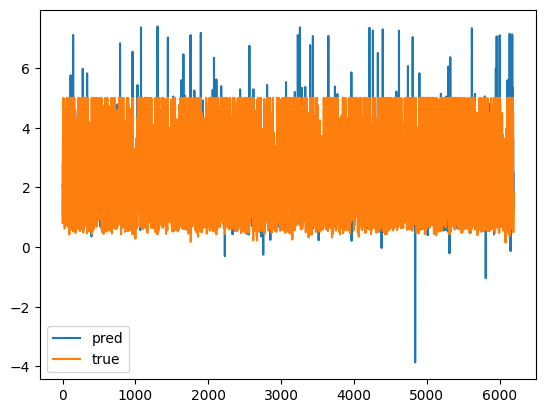

In [ ]:
plt.plot(np.array(fit_train3.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='true')
plt.legend()
plt.show()

In [ ]:
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(X_test))
print(mse3)

0.6732178187755448


In [ ]:
print(mse1, ': 기존 base')
print(mse2, ': outlier 제거')
print(mse3, ': outlier 보존')

0.6733369308637225 : 기존 base
0.6664311535158717 : outlier 제거
0.6732178187755448 : outlier 보존


outlier 제거한 경우의 예측값이 가장 높음